In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!rm -rf ~/.cache/

In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/MLPS_final_project/data/covidcast_new.csv'

df = pd.read_csv(file_path)

df.head()

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,1/7/2021,1000,34.412959,12.541558,1.464798,65.771681,22.086274,52.854667,29.288429,30.487852,57.334785,3.244379,2.6382,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098
1,1/7/2021,1003,32.814153,10.189340,1.270183,61.516584,25.179399,51.160278,NaN,28.384842,53.172285,1.199572,NaN,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249
2,1/7/2021,1015,35.621311,14.591271,6.594649,NaN,NaN,54.503711,NaN,37.003522,NaN,3.890709,NaN,NaN,20.974363,NaN,NaN,NaN,13.255336
3,1/7/2021,1051,40.453615,14.164503,3.320922,68.718538,19.438763,54.948755,NaN,37.637900,67.550815,3.284647,NaN,30.223647,20.009477,7.570250,26.494057,86.587182,13.823318
4,1/7/2021,1069,39.228766,10.103564,0.288897,59.961036,23.065494,60.118290,NaN,36.156326,55.995745,1.881970,NaN,30.806929,16.574756,12.916249,24.747620,85.825453,10.258936


In [ ]:
time_values = df['time_value'].unique()
num_distinct_times = len(time_values)
print(num_distinct_times)

37


In [ ]:
df.shape

(25626, 19)

In [ ]:
df.describe()

,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
count,25626.000000,25066.000000,24688.000000,25066.000000,22515.000000,21257.000000,25066.000000,3994.000000,25066.000000,22097.000000,25481.000000,23024.000000,21366.000000,25066.000000,21123.000000,21270.000000,21985.000000,25066.000000
mean,30022.116717,31.899631,13.120482,2.891016,68.690158,31.117297,53.524201,17.250770,33.999334,81.330137,1.055272,13.674725,34.275744,15.422098,10.100442,36.036825,91.912426,8.514499
std,15464.317094,6.038189,4.640677,2.661727,5.684796,6.641353,5.625381,7.419522,6.310551,12.676522,0.694818,6.665828,5.137006,6.014144,3.353021,7.192531,5.103774,4.269184
min,1000.000000,11.685945,2.144153,0.095057,40.062171,11.408837,32.682451,1.548609,11.041209,22.668564,0.000000,0.891041,15.283547,0.367614,1.256728,13.241941,58.270015,0.274725
25%,17113.000000,27.811878,9.890346,1.565133,65.117334,26.385056,49.588164,11.616797,29.658307,75.032420,0.560933,8.333788,30.858041,10.896965,7.709210,30.833044,89.285249,5.254783
50%,33005.000000,31.685359,12.451805,2.384280,69.024887,30.788040,53.015007,16.530456,33.731881,85.196143,0.942783,12.773208,34.188723,15.375892,9.852045,35.865667,93.220612,7.993092
75%,42077.000000,35.744053,15.601016,3.461986,72.587625,35.415755,57.217082,22.153012,38.154894,90.995163,1.436505,18.000759,37.691155,19.462221,12.118213,41.051398,95.717480,11.135571
max,56025.000000,58.805310,40.974146,36.015469,93.900646,56.214259,83.593709,46.644291,59.786678,99.373646,5.123363,45.466215,63.411506,51.142119,28.285788,62.468991,99.732673,33.337252


# Using knn to fill x_missing data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Load the dataset
# Assuming the data is in a CSV file named 'covid_data.csv'
data = pd.read_csv('/content/drive/My Drive/MLPS_final_project/data/covidcast_new.csv')

# Check for missing values before imputation
print("Missing values before imputation:")
print(data.isnull().sum())

Missing values before imputation:
time_value                                  0
geo_value                                   0
smoothed_wspent_time_1d                   560
smoothed_wtested_14d                      938
smoothed_wpublic_transit_1d               560
smoothed_wworried_become_ill             3111
smoothed_wvaccine_likely_govt_health     4369
smoothed_wshop_1d                         560
smoothed_wtested_positive_14d           21632
smoothed_wwork_outside_home_1d            560
smoothed_wothers_masked                  3529
smoothed_wcli                             145
smoothed_wcovid_vaccinated               2602
smoothed_wvaccine_likely_friends         4260
smoothed_wrestaurant_1d                   560
smoothed_wvaccine_likely_politicians     4503
smoothed_wvaccine_likely_who             4356
smoothed_wwearing_mask                   3641
smoothed_wlarge_event_1d                  560
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Define target variables that should not be imputed
target_variables = ['smoothed_wtested_positive_14d', 'smoothed_wcovid_vaccinated']

# Select numerical data excluding target variables
numerical_data = data.select_dtypes(include=[np.number]).copy()
cols_to_impute = [col for col in numerical_data.columns if col not in target_variables]

# Create a dataframe with only columns to impute
data_to_impute = numerical_data[cols_to_impute].copy()

# Create a KNNImputer instance with n=3
imputer = KNNImputer(n_neighbors=3, weights="distance")

# Apply imputation to non-target numerical columns
imputed_array = imputer.fit_transform(data_to_impute)

# Convert the imputed array back to a DataFrame
imputed_data = pd.DataFrame(imputed_array, columns=data_to_impute.columns)

# Replace only the non-target columns in the original DataFrame
for col in cols_to_impute:
    data[col] = imputed_data[col]

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(data.isnull().sum())

# Verify target variables were not imputed
for target in target_variables:
    if target in data.columns:
        original_na_count = numerical_data[target].isna().sum()
        current_na_count = data[target].isna().sum()
        print(f"\nTarget variable '{target}':")
        print(f"Original missing values: {original_na_count}")
        print(f"Current missing values: {current_na_count}")
        if original_na_count == current_na_count:
            print("✓ Successfully preserved original values")
        else:
            print("Warning: Missing values count has changed")



Missing values after imputation:
time_value                                  0
geo_value                                   0
smoothed_wspent_time_1d                     0
smoothed_wtested_14d                        0
smoothed_wpublic_transit_1d                 0
smoothed_wworried_become_ill                0
smoothed_wvaccine_likely_govt_health        0
smoothed_wshop_1d                           0
smoothed_wtested_positive_14d           21632
smoothed_wwork_outside_home_1d              0
smoothed_wothers_masked                     0
smoothed_wcli                               0
smoothed_wcovid_vaccinated               2602
smoothed_wvaccine_likely_friends            0
smoothed_wrestaurant_1d                     0
smoothed_wvaccine_likely_politicians        0
smoothed_wvaccine_likely_who                0
smoothed_wwearing_mask                      0
smoothed_wlarge_event_1d                    0
dtype: int64

Target variable 'smoothed_wtested_positive_14d':
Original missing values: 2163

In [ ]:
# Save the imputed dataset
data.to_csv('/content/drive/My Drive/MLPS_final_project/data/covid_data_x_filled.csv', index=False)

print("\nImputation completed and saved to 'covid_data_x_filled.csv'")
print("Note: Target variables were left unchanged")


Imputation completed and saved to 'covid_data_x_filled.csv'
Note: Target variables were left unchanged


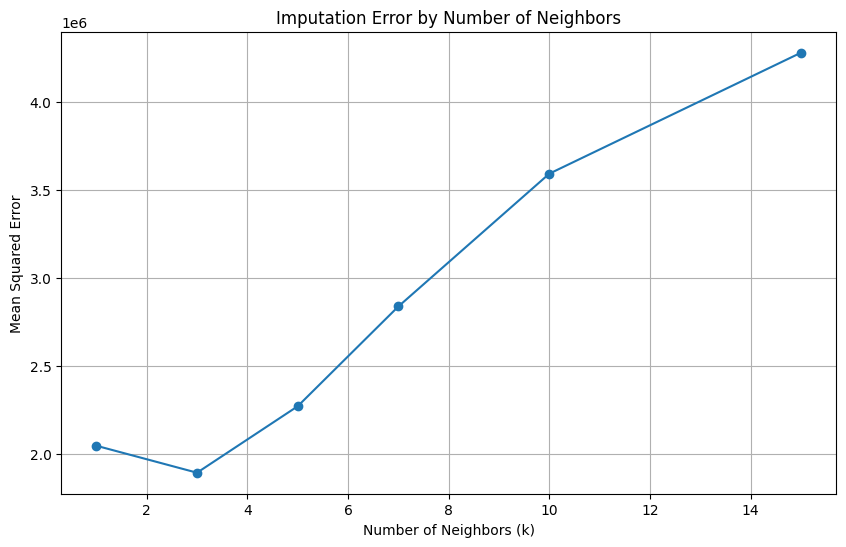

Optimal number of neighbors: 3


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def evaluate_imputation(data, n_neighbors_list, mask_fraction=0.1, n_splits=5):
    """
    Evaluate imputation performance for different n_neighbors values

    Parameters:
    -----------
    data : DataFrame
        The complete data (rows with any missing values are dropped)
    n_neighbors_list : list
        List of n_neighbors values to try
    mask_fraction : float
        Fraction of data to mask for testing
    n_splits : int
        Number of cross-validation splits

    Returns:
    --------
    DataFrame with MSE for each n_neighbors value
    """
    # Drop rows with missing values to get complete cases
    complete_data = data.dropna()

    # Initialize results
    results = {}

    # Initialize KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for n_neighbors in n_neighbors_list:
        mse_list = []

        for train_idx, test_idx in kf.split(complete_data):
            # Split data
            train_data = complete_data.iloc[train_idx].copy()
            test_data = complete_data.iloc[test_idx].copy()

            # Create mask for test data
            mask = np.random.rand(*test_data.shape) < mask_fraction

            # Store original values before masking
            true_values = test_data.values.copy()

            # Create copy with artificial missing values
            test_masked = test_data.copy()
            test_masked.values[mask] = np.nan

            # Combine train and masked test data for imputation
            combined_data = pd.concat([train_data, test_masked])

            # Impute
            imputer = KNNImputer(n_neighbors=n_neighbors, weights="distance")
            imputed_data = imputer.fit_transform(combined_data)

            # Extract test portion of imputed data
            imputed_test = imputed_data[-len(test_data):]

            # Calculate MSE only for imputed values
            mse = mean_squared_error(
                true_values[mask],
                imputed_test[mask]
            )
            mse_list.append(mse)

        results[n_neighbors] = np.mean(mse_list)

    return pd.DataFrame({'n_neighbors': n_neighbors_list, 'MSE': [results[k] for k in n_neighbors_list]})

# Example usage
# First prepare your data (assuming 'data' is your COVID dataset)
numerical_data = data.select_dtypes(include=[np.number])

# Evaluate different k values
n_neighbors_list = [1, 3, 5, 7, 10, 15]
results = evaluate_imputation(numerical_data, n_neighbors_list)

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(results['n_neighbors'], results['MSE'], marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Imputation Error by Number of Neighbors')
plt.grid(True)
plt.savefig('imputation_evaluation.png')
plt.show()

# Find optimal k value
optimal_k = results.loc[results['MSE'].idxmin(), 'n_neighbors']
print(f"Optimal number of neighbors: {optimal_k}")

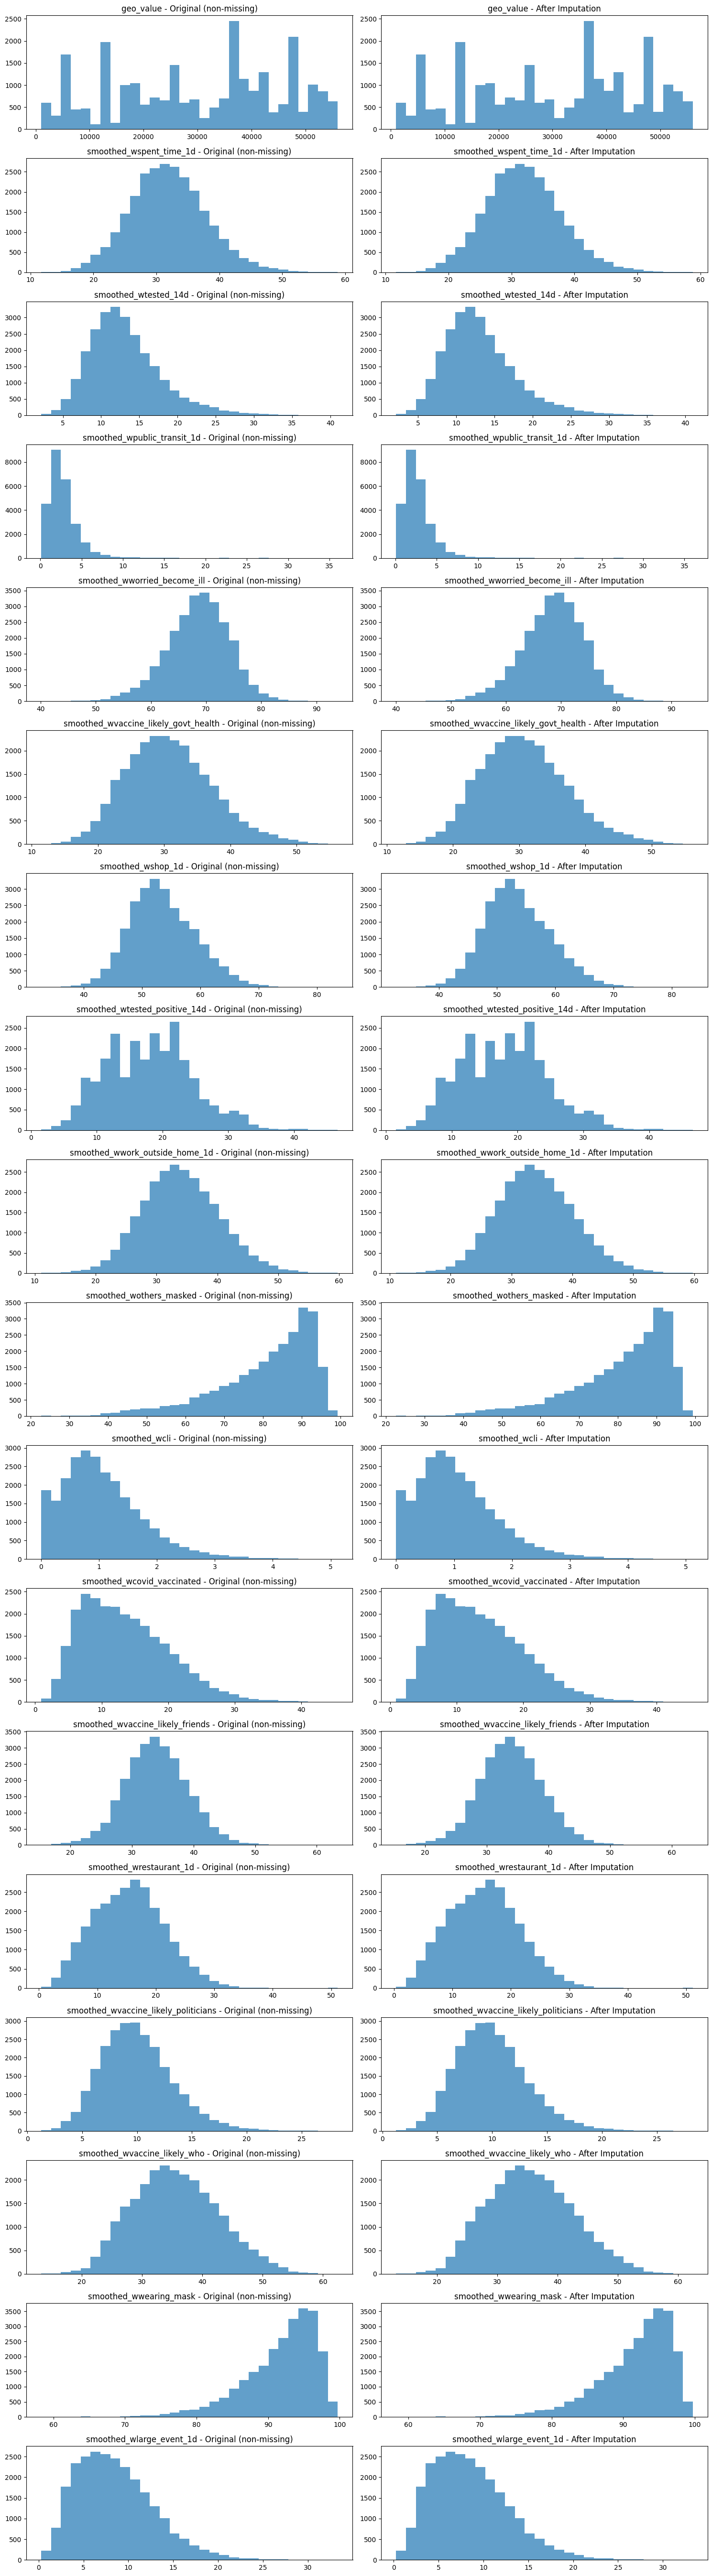

In [ ]:
def compare_distributions(original_data, imputed_data):
    """Compare distributions before and after imputation"""
    fig, axes = plt.subplots(len(original_data.columns), 2, figsize=(15, 3*len(original_data.columns)))

    for i, col in enumerate(original_data.columns):
        # Original data with missing values
        axes[i, 0].hist(original_data[col].dropna(), bins=30, alpha=0.7)
        axes[i, 0].set_title(f"{col} - Original (non-missing)")

        # Imputed data
        axes[i, 1].hist(imputed_data[col], bins=30, alpha=0.7)
        axes[i, 1].set_title(f"{col} - After Imputation")

    plt.tight_layout()
    plt.savefig('distribution_comparison.png')
    plt.show()

# Example usage
compare_distributions(data.select_dtypes(include=[np.number]), imputed_data)

Loading data...
Data type analysis:
time_value: object
  Sample values: ['1/7/2021' '1/8/2021' '1/9/2021' '1/10/2021' '1/11/2021']
geo_value: int64
smoothed_wspent_time_1d: float64
smoothed_wtested_14d: float64
smoothed_wpublic_transit_1d: float64
smoothed_wworried_become_ill: float64
smoothed_wvaccine_likely_govt_health: float64
smoothed_wshop_1d: float64
smoothed_wtested_positive_14d: float64
smoothed_wwork_outside_home_1d: float64
smoothed_wothers_masked: float64
smoothed_wcli: float64
smoothed_wcovid_vaccinated: float64
smoothed_wvaccine_likely_friends: float64
smoothed_wrestaurant_1d: float64
smoothed_wvaccine_likely_politicians: float64
smoothed_wvaccine_likely_who: float64
smoothed_wwearing_mask: float64
smoothed_wlarge_event_1d: float64
Found 18 numeric columns and 1 non-numeric columns
Converted 1 date columns to numeric representation

Checking for missing values in numeric data:
Columns with missing values:
smoothed_wspent_time_1d: 560 missing values (2.19%)
smoothed_wtested

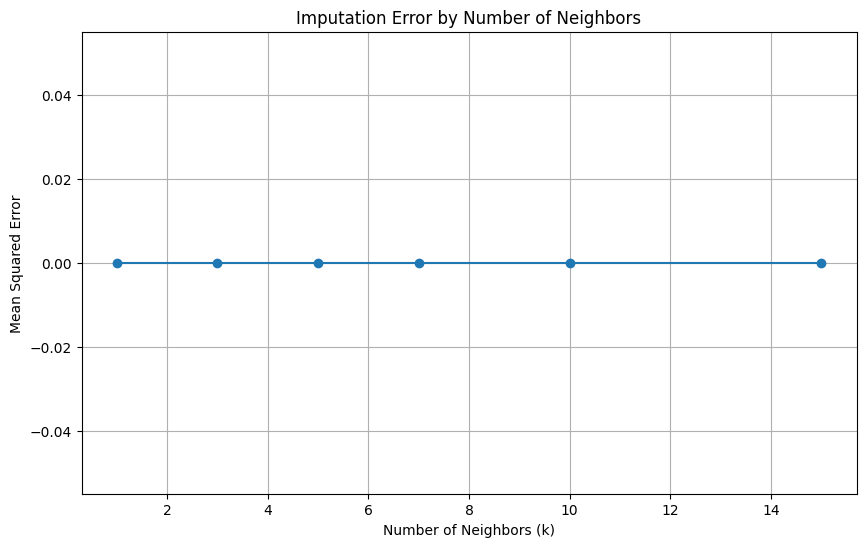


Performing imputation with k=1...

Analyzing stability of imputation for selected columns...
Available columns:
['geo_value', 'smoothed_wspent_time_1d', 'smoothed_wtested_14d', 'smoothed_wpublic_transit_1d', 'smoothed_wworried_become_ill', 'smoothed_wvaccine_likely_govt_health', 'smoothed_wshop_1d', 'smoothed_wtested_positive_14d', 'smoothed_wwork_outside_home_1d', 'smoothed_wothers_masked', 'smoothed_wcli', 'smoothed_wcovid_vaccinated', 'smoothed_wvaccine_likely_friends', 'smoothed_wrestaurant_1d', 'smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who', 'smoothed_wwearing_mask', 'smoothed_wlarge_event_1d', 'time_value_numeric']
Found 560 missing values in column smoothed_wspent_time_1d
Stability analysis for column smoothed_wspent_time_1d:
Average standard deviation across k values: 0.9341056167568801
Average range across k values: 2.379760063030571


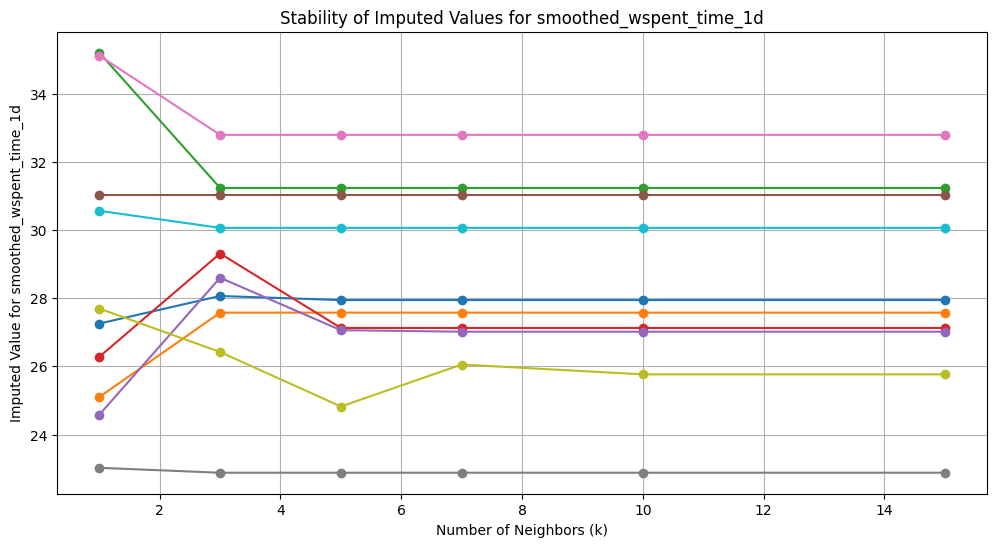

Available columns:
['geo_value', 'smoothed_wspent_time_1d', 'smoothed_wtested_14d', 'smoothed_wpublic_transit_1d', 'smoothed_wworried_become_ill', 'smoothed_wvaccine_likely_govt_health', 'smoothed_wshop_1d', 'smoothed_wtested_positive_14d', 'smoothed_wwork_outside_home_1d', 'smoothed_wothers_masked', 'smoothed_wcli', 'smoothed_wcovid_vaccinated', 'smoothed_wvaccine_likely_friends', 'smoothed_wrestaurant_1d', 'smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who', 'smoothed_wwearing_mask', 'smoothed_wlarge_event_1d', 'time_value_numeric']
Found 938 missing values in column smoothed_wtested_14d
Stability analysis for column smoothed_wtested_14d:
Average standard deviation across k values: 0.6912256644801464
Average range across k values: 1.7851538618347187


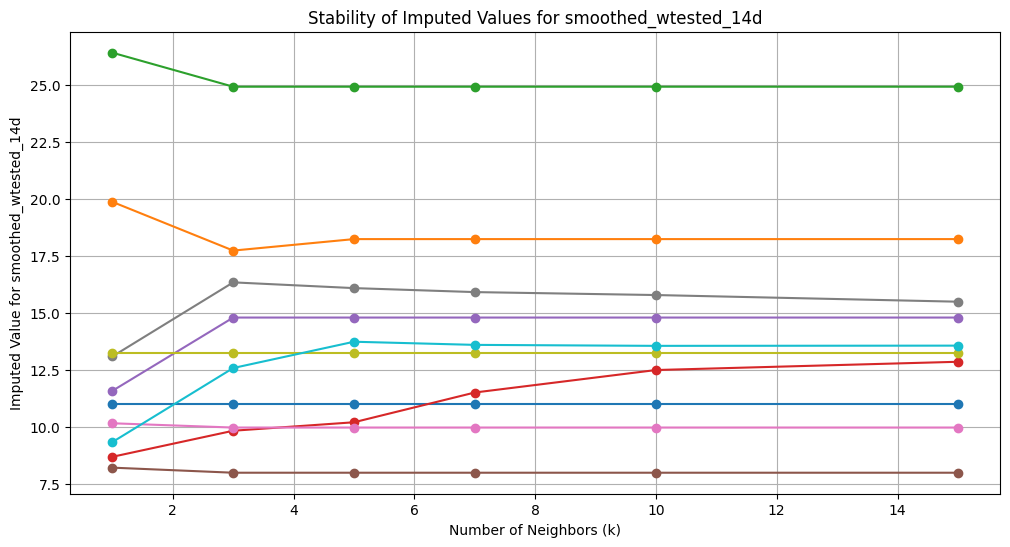

Available columns:
['geo_value', 'smoothed_wspent_time_1d', 'smoothed_wtested_14d', 'smoothed_wpublic_transit_1d', 'smoothed_wworried_become_ill', 'smoothed_wvaccine_likely_govt_health', 'smoothed_wshop_1d', 'smoothed_wtested_positive_14d', 'smoothed_wwork_outside_home_1d', 'smoothed_wothers_masked', 'smoothed_wcli', 'smoothed_wcovid_vaccinated', 'smoothed_wvaccine_likely_friends', 'smoothed_wrestaurant_1d', 'smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who', 'smoothed_wwearing_mask', 'smoothed_wlarge_event_1d', 'time_value_numeric']
Found 560 missing values in column smoothed_wpublic_transit_1d
Stability analysis for column smoothed_wpublic_transit_1d:
Average standard deviation across k values: 0.34771985209452944
Average range across k values: 0.8886325676563734


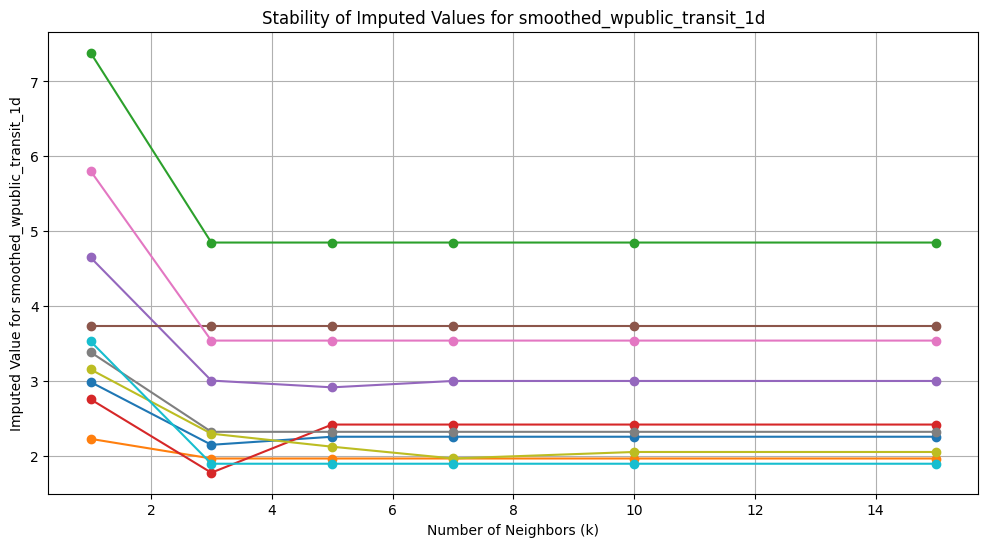


Imputation summary:
Optimal k value: 1
Total missing values filled: 56446


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Function to check data types
def analyze_data_types(df):
    """Analyze and print data types in the dataframe"""
    print("Data type analysis:")
    dtypes = df.dtypes
    for col, dtype in dtypes.items():
        print(f"{col}: {dtype}")
        # If string or object type, show some unique values
        if dtype == 'object':
            unique_vals = df[col].dropna().unique()[:5]  # Show at most 5 unique values
            print(f"  Sample values: {unique_vals}")

    return

# Function to preprocess the dataset for KNN imputation
def preprocess_for_knn(df):
    """Prepare data for KNN imputation by separating numeric and non-numeric features"""
    # Identify numeric and non-numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

    print(f"Found {len(numeric_cols)} numeric columns and {len(non_numeric_cols)} non-numeric columns")

    # Handle date columns - convert to numeric representation
    date_cols = []
    for col in non_numeric_cols:
        # Try to convert to datetime
        try:
            df[f"{col}_numeric"] = pd.to_datetime(df[col]).astype(np.int64) // 10**9  # Convert to Unix timestamp
            date_cols.append(col)
            numeric_cols.append(f"{col}_numeric")
        except:
            pass

    print(f"Converted {len(date_cols)} date columns to numeric representation")

    # Create DataFrame with only numeric columns for imputation
    numeric_df = df[numeric_cols].copy()

    return numeric_df, numeric_cols, non_numeric_cols, date_cols

# Stability analysis function with improved error handling
def stability_analysis(data, column_to_check, k_values=None):
    """Analyze imputation stability for a specific column across different k values"""
    if k_values is None:
        k_values = [3, 5, 7, 10, 15]

    # First, check if the column exists and handle possible whitespace issues
    available_columns = data.columns.tolist()

    # Print available columns for debugging
    print("Available columns:")
    print(available_columns)

    # Check column existence
    if column_to_check not in available_columns:
        # Try to find a column that matches when whitespace is stripped
        matching_cols = [col for col in available_columns
                         if col.strip() == column_to_check.strip()]

        if matching_cols:
            print(f"Column '{column_to_check}' not found exactly, but found similar column: '{matching_cols[0]}'")
            column_to_check = matching_cols[0]
        else:
            print(f"Column '{column_to_check}' not found in the dataset.")
            return None

    # Get indices of missing values in the column
    missing_indices = data[data[column_to_check].isna()].index

    if len(missing_indices) == 0:
        print(f"No missing values in column {column_to_check}")
        return None

    print(f"Found {len(missing_indices)} missing values in column {column_to_check}")

    # Store imputed values for each k
    imputed_values = {}

    for k in k_values:
        imputer = KNNImputer(n_neighbors=k, weights="distance")
        try:
            imputed = pd.DataFrame(
                imputer.fit_transform(data),
                columns=data.columns,
                index=data.index
            )
            imputed_values[k] = imputed.loc[missing_indices, column_to_check]
        except Exception as e:
            print(f"Error with k={k}: {str(e)}")
            continue

    if not imputed_values:
        print("Could not perform imputation for any k value.")
        return None

    # Convert to DataFrame for easier analysis
    stability_df = pd.DataFrame(imputed_values)

    # Calculate statistics
    std_devs = stability_df.std(axis=1)
    range_vals = stability_df.max(axis=1) - stability_df.min(axis=1)

    print(f"Stability analysis for column {column_to_check}:")
    print(f"Average standard deviation across k values: {std_devs.mean()}")
    print(f"Average range across k values: {range_vals.mean()}")

    # Plot imputed values for each missing entry
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(stability_df.index):
        # Limit to showing only 10 lines to avoid overcrowding
        if i < 10:
            plt.plot(k_values, stability_df.loc[idx], marker='o', label=f"Index {idx}")

    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel(f'Imputed Value for {column_to_check}')
    plt.title(f'Stability of Imputed Values for {column_to_check}')
    plt.grid(True)
    if len(missing_indices) < 10:  # Only show legend if not too many lines
        plt.legend()
    plt.savefig(f'stability_{column_to_check.replace(" ", "_")}.png')
    plt.show()

    return stability_df

# Cross-validation for imputation
def evaluate_imputation(data, n_neighbors_list, mask_fraction=0.1, n_splits=5):
    """Evaluate imputation performance for different n_neighbors values"""
    # Check if there's enough complete data
    complete_data = data.dropna()
    if len(complete_data) < 20:  # Not enough complete rows
        print("Not enough complete rows for cross-validation. Using artificial masking instead.")
        return evaluate_artificial_masking(data, n_neighbors_list, mask_fraction)

    results = {}
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for n_neighbors in n_neighbors_list:
        mse_list = []

        for train_idx, test_idx in kf.split(complete_data):
            train_data = complete_data.iloc[train_idx].copy()
            test_data = complete_data.iloc[test_idx].copy()

            # Create mask for test data
            mask = np.random.rand(*test_data.shape) < mask_fraction

            # Store original values before masking
            true_values = test_data.values.copy()

            # Create copy with artificial missing values
            test_masked = test_data.copy()
            test_masked.values[mask] = np.nan

            # Combine train and masked test data for imputation
            combined_data = pd.concat([train_data, test_masked])

            # Impute
            imputer = KNNImputer(n_neighbors=n_neighbors, weights="distance")
            imputed_data = imputer.fit_transform(combined_data)

            # Extract test portion of imputed data
            imputed_test = imputed_data[-len(test_data):]

            # Calculate MSE only for imputed values
            mse = mean_squared_error(
                true_values[mask],
                imputed_test[mask]
            )
            mse_list.append(mse)

        results[n_neighbors] = np.mean(mse_list)

    return pd.DataFrame({'n_neighbors': n_neighbors_list, 'MSE': [results[k] for k in n_neighbors_list]})

def evaluate_artificial_masking(data, n_neighbors_list, mask_fraction=0.1):
    """Alternative evaluation by artificially masking known values"""
    results = {}

    for n_neighbors in n_neighbors_list:
        mse_scores = []

        # Perform multiple runs to get stable estimates
        for run in range(5):
            # For each column with sufficient non-missing values
            for col in data.columns:
                non_missing = data[~data[col].isna()]
                if len(non_missing) < 10:  # Skip columns with too few values
                    continue

                # Create a copy and mask some values
                test_data = data.copy()
                mask_indices = np.random.choice(
                    non_missing.index,
                    size=max(1, int(len(non_missing) * mask_fraction)),
                    replace=False
                )

                true_values = test_data.loc[mask_indices, col].values
                test_data.loc[mask_indices, col] = np.nan

                # Impute
                try:
                    imputer = KNNImputer(n_neighbors=n_neighbors, weights="distance")
                    imputed_data = pd.DataFrame(
                        imputer.fit_transform(test_data),
                        columns=test_data.columns,
                        index=test_data.index
                    )

                    imputed_values = imputed_data.loc[mask_indices, col].values
                    mse = mean_squared_error(true_values, imputed_values)
                    mse_scores.append(mse)
                except Exception as e:
                    print(f"Error in evaluation for k={n_neighbors}: {str(e)}")

        if mse_scores:
            results[n_neighbors] = np.mean(mse_scores)
        else:
            results[n_neighbors] = np.nan

    return pd.DataFrame({'n_neighbors': n_neighbors_list, 'MSE': [results[k] for k in n_neighbors_list]})

# Main execution
def main():
    print("Loading data...")
    # Load the dataset
    data2 = pd.read_csv('/content/drive/My Drive/MLPS_final_project/data/covidcast_new.csv')

    # Analyze data types
    analyze_data_types(data2)

    # Preprocess data for KNN imputation
    numeric_df, numeric_cols, non_numeric_cols, date_cols = preprocess_for_knn(data2)

    print("\nChecking for missing values in numeric data:")
    missing_counts = numeric_df.isnull().sum()
    cols_with_missing = missing_counts[missing_counts > 0]

    if cols_with_missing.empty:
        print("No missing values found in numeric columns!")
        return

    print("Columns with missing values:")
    for col, count in cols_with_missing.items():
        print(f"{col}: {count} missing values ({count/len(numeric_df)*100:.2f}%)")

    # Evaluate different k values
    print("\nEvaluating different k values for imputation...")
    n_neighbors_list = [1, 3, 5, 7, 10, 15]
    cv_results = evaluate_imputation(numeric_df, n_neighbors_list)

    if cv_results is not None and not cv_results['MSE'].isna().all():
        # Find optimal k
        cv_results = cv_results.dropna()
        if not cv_results.empty:
            optimal_k = cv_results.loc[cv_results['MSE'].idxmin(), 'n_neighbors']
            print(f"Optimal number of neighbors based on evaluation: {optimal_k}")

            # Plot results
            plt.figure(figsize=(10, 6))
            plt.plot(cv_results['n_neighbors'], cv_results['MSE'], marker='o')
            plt.xlabel('Number of Neighbors (k)')
            plt.ylabel('Mean Squared Error')
            plt.title('Imputation Error by Number of Neighbors')
            plt.grid(True)
            plt.savefig('knn_evaluation_results.png')
            plt.show()
        else:
            print("No valid results from evaluation. Using default k=5.")
            optimal_k = 5
    else:
        print("Evaluation failed. Using default k=5.")
        optimal_k = 5

    # Perform imputation with optimal k
    print(f"\nPerforming imputation with k={optimal_k}...")
    imputer = KNNImputer(n_neighbors=optimal_k, weights="distance")

    try:
        imputed_array = imputer.fit_transform(numeric_df)
        imputed_numeric_df = pd.DataFrame(imputed_array, columns=numeric_df.columns, index=numeric_df.index)

        # Check stability for a few columns with missing values
        print("\nAnalyzing stability of imputation for selected columns...")
        for col in cols_with_missing.index[:min(3, len(cols_with_missing))]:  # Check up to 3 columns
            stability_df = stability_analysis(numeric_df, col, k_values=[1, 3, 5, 7, 10, 15])

        # Save imputed data
        # First, update the numeric columns in the original dataframe
        imputed_data = data.copy()
        for col in numeric_df.columns:
            imputed_data[col] = imputed_numeric_df[col]

        # Convert back date columns from numeric to datetime if needed
        for col in date_cols:
            numeric_col = f"{col}_numeric"
            if numeric_col in imputed_data.columns:
                # First keep the original column if it exists
                imputed_data[f"{col}_original"] = imputed_data[col]
                # Then convert numeric timestamps back to datetime
                imputed_data[col] = pd.to_datetime(imputed_data[numeric_col], unit='s')
                # Drop the numeric column
                imputed_data.drop(columns=[numeric_col], inplace=True)

        # Save the fully imputed dataset
        #imputed_data.to_csv('/content/drive/My Drive/MLPS_final_project/data/covidcast_imputed.csv', index=False)
        #print(f"\nImputed data saved to 'covidcast_imputed.csv'")

        # Print summary statistics
        print("\nImputation summary:")
        print(f"Optimal k value: {optimal_k}")
        print(f"Total missing values filled: {numeric_df.isnull().sum().sum()}")

    except Exception as e:
        print(f"Error during imputation: {str(e)}")
        print("Try applying imputation separately to numeric and categorical data.")

if __name__ == "__main__":
    main()


Evaluating prediction of smoothed_wtested_positive_14d
Best alpha for Ridge: 10
Ridge Performance:
Training RMSE: 5.5777
Test RMSE: 5.6502
Training R²: 0.3131
Test R²: 0.3003
Training MAE: 4.4588
Test MAE: 4.5570
--------------------------------------------------


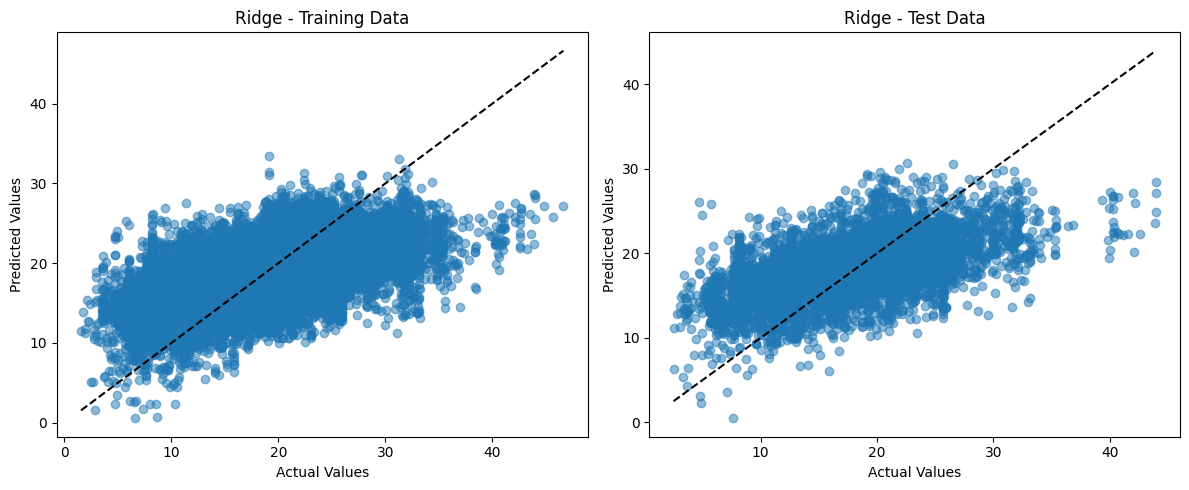

Ridge Cross-Validation Results (k=5):
RMSE: 5.6386 ± 0.2530
R²: 0.2682 ± 0.0246
MAE: 4.5163 ± 0.1726
--------------------------------------------------


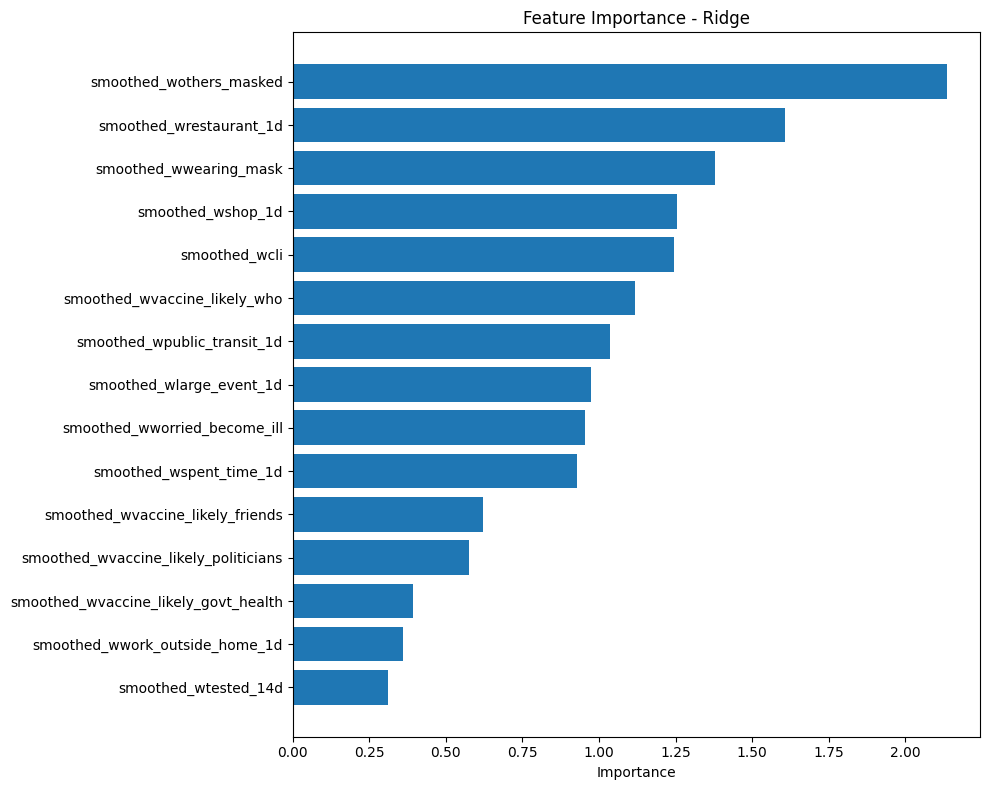

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Performance:
Training RMSE: 1.0209
Test RMSE: 2.4372
Training R²: 0.9770
Test R²: 0.8698
Training MAE: 0.7347
Test MAE: 1.8078
--------------------------------------------------


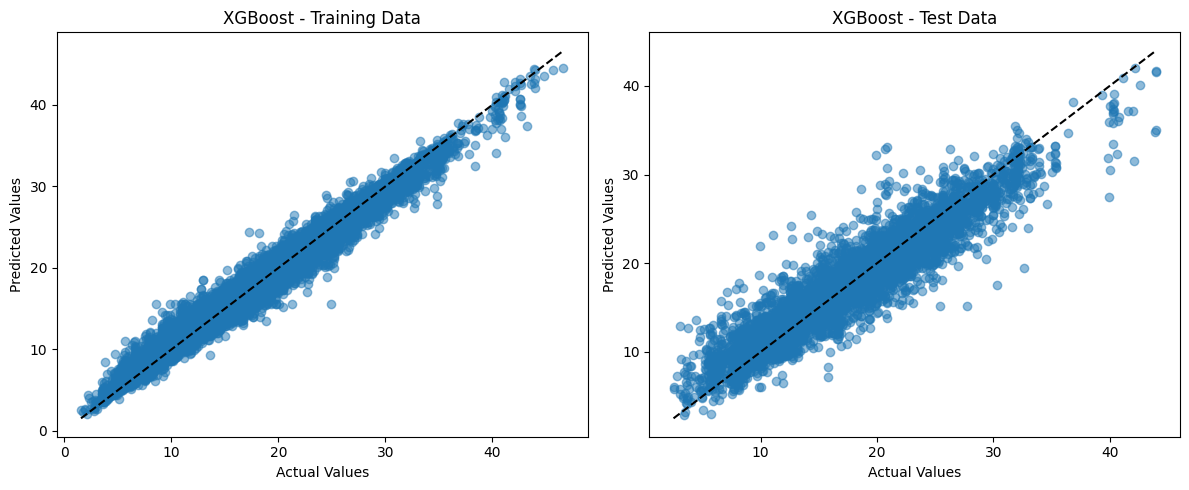

XGBoost Cross-Validation Results (k=5):
RMSE: 3.1570 ± 0.1882
R²: 0.7689 ± 0.0330
MAE: 2.3521 ± 0.1390
--------------------------------------------------


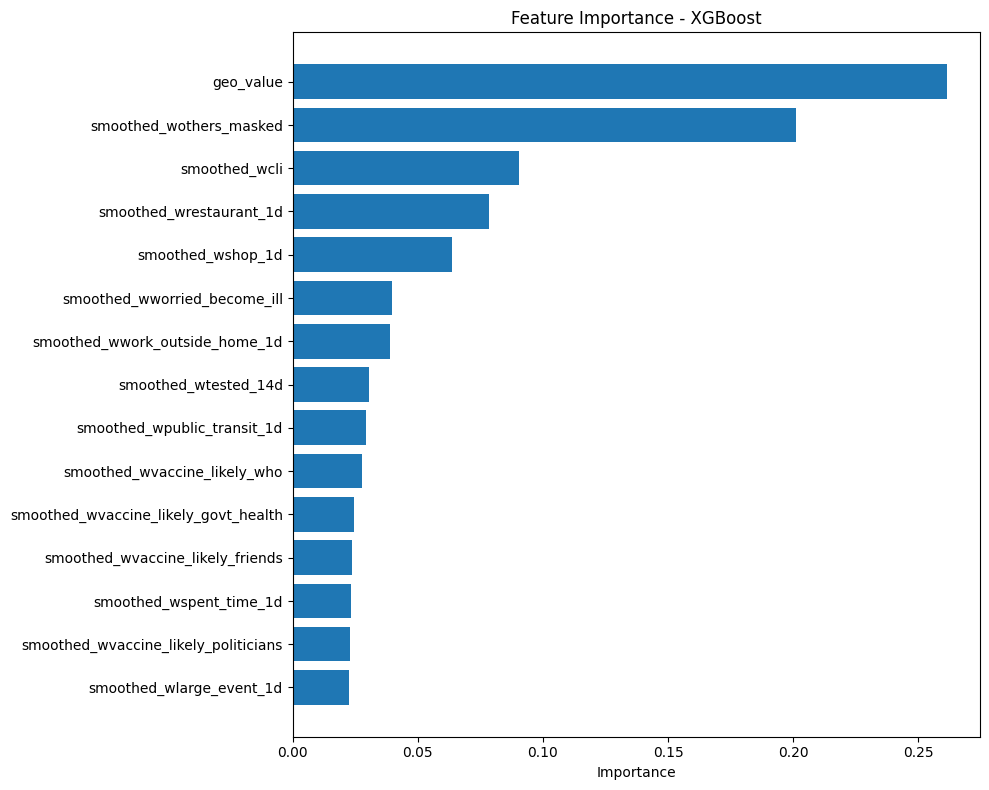


Model Comparison:
     Model  Train RMSE  Test RMSE  Train R²   Test R²  Train MAE  Test MAE
0    Ridge    5.577738   5.650211  0.313135  0.300263   4.458774  4.557033
1  XGBoost    1.020919   2.437176  0.976989  0.869810   0.734685  1.807767


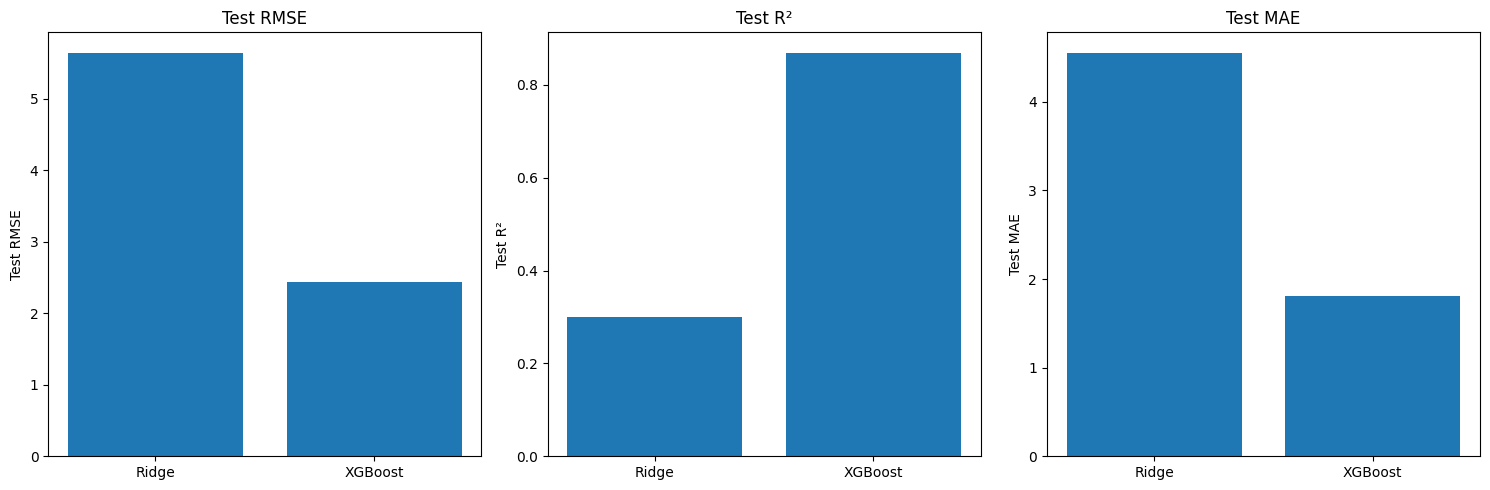


Evaluating prediction of smoothed_wcovid_vaccinated
Best alpha for Ridge: 100
Ridge Performance:
Training RMSE: 5.7443
Test RMSE: 5.8349
Training R²: 0.2476
Test R²: 0.2195
Training MAE: 4.4992
Test MAE: 4.5375
--------------------------------------------------


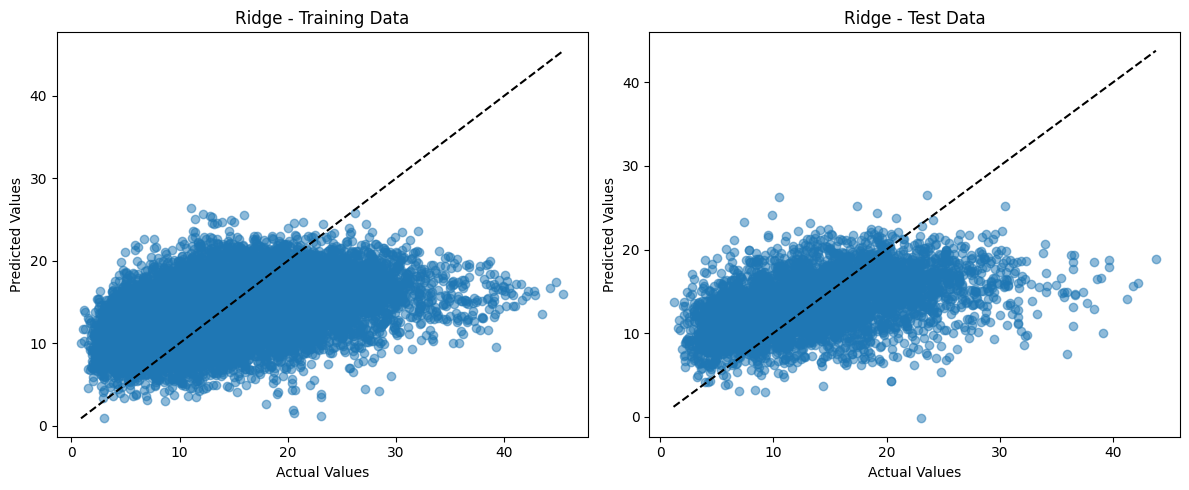

Ridge Cross-Validation Results (k=5):
RMSE: 6.3252 ± 1.1519
R²: -0.8115 ± 0.4372
MAE: 5.1416 ± 1.0078
--------------------------------------------------


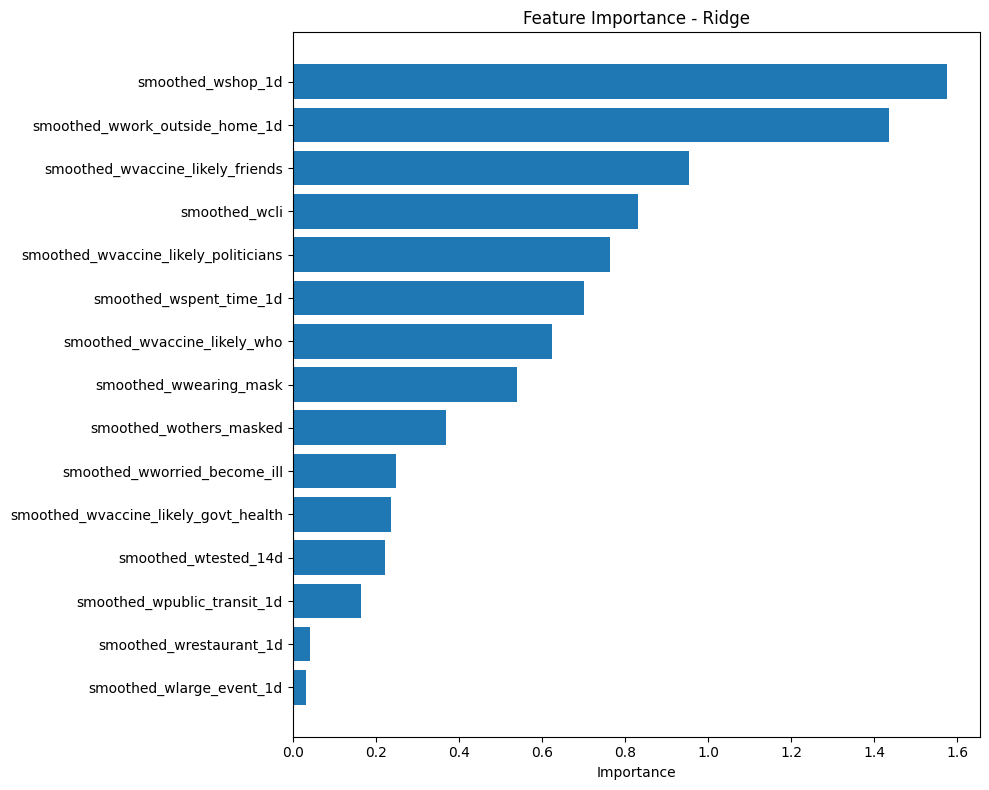

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Performance:
Training RMSE: 1.6064
Test RMSE: 4.0141
Training R²: 0.9412
Test R²: 0.6306
Training MAE: 1.1684
Test MAE: 2.9867
--------------------------------------------------


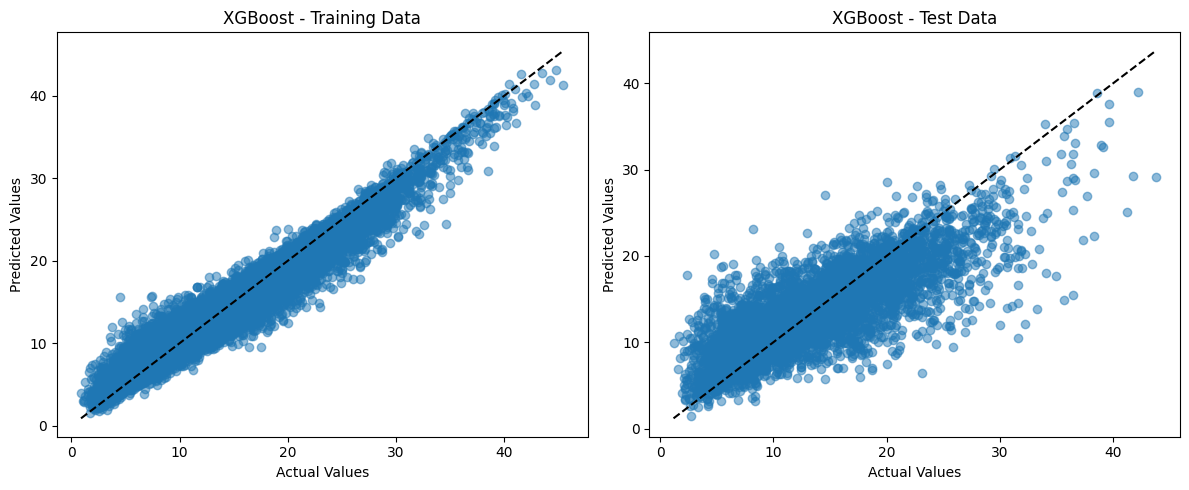

XGBoost Cross-Validation Results (k=5):
RMSE: 5.4423 ± 1.0791
R²: -0.3461 ± 0.3679
MAE: 4.3317 ± 0.8910
--------------------------------------------------


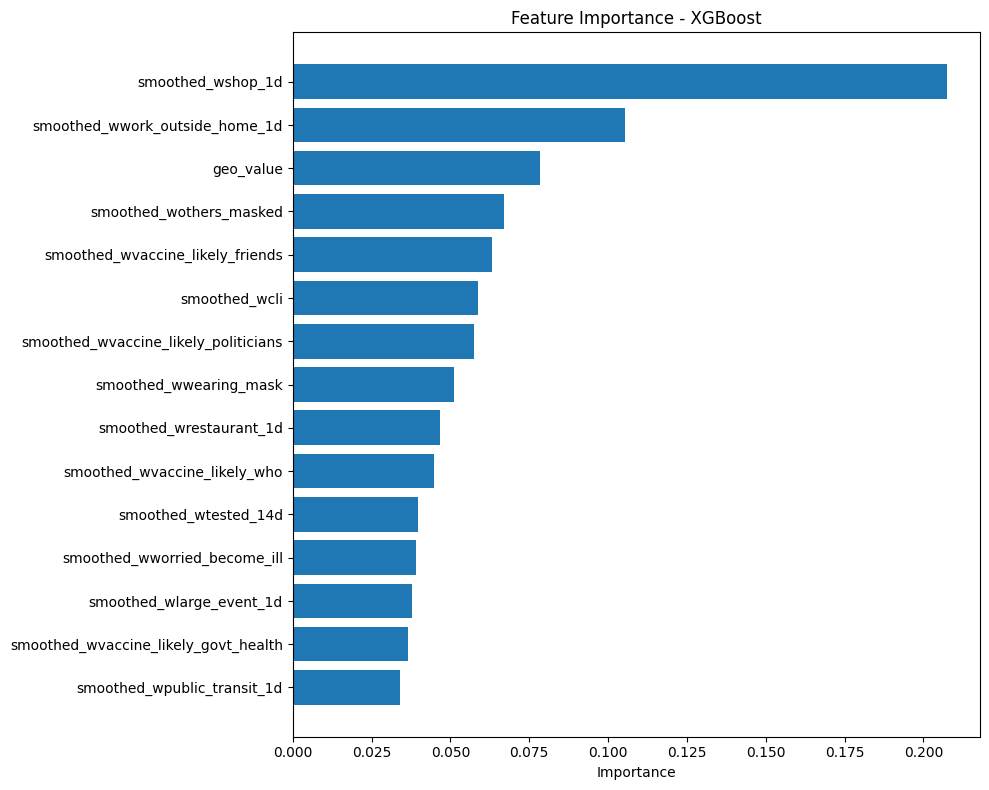


Model Comparison:
     Model  Train RMSE  Test RMSE  Train R²   Test R²  Train MAE  Test MAE
0    Ridge    5.744258   5.834914  0.247589  0.219532   4.499209  4.537511
1  XGBoost    1.606359   4.014095  0.941160  0.630630   1.168405  2.986743


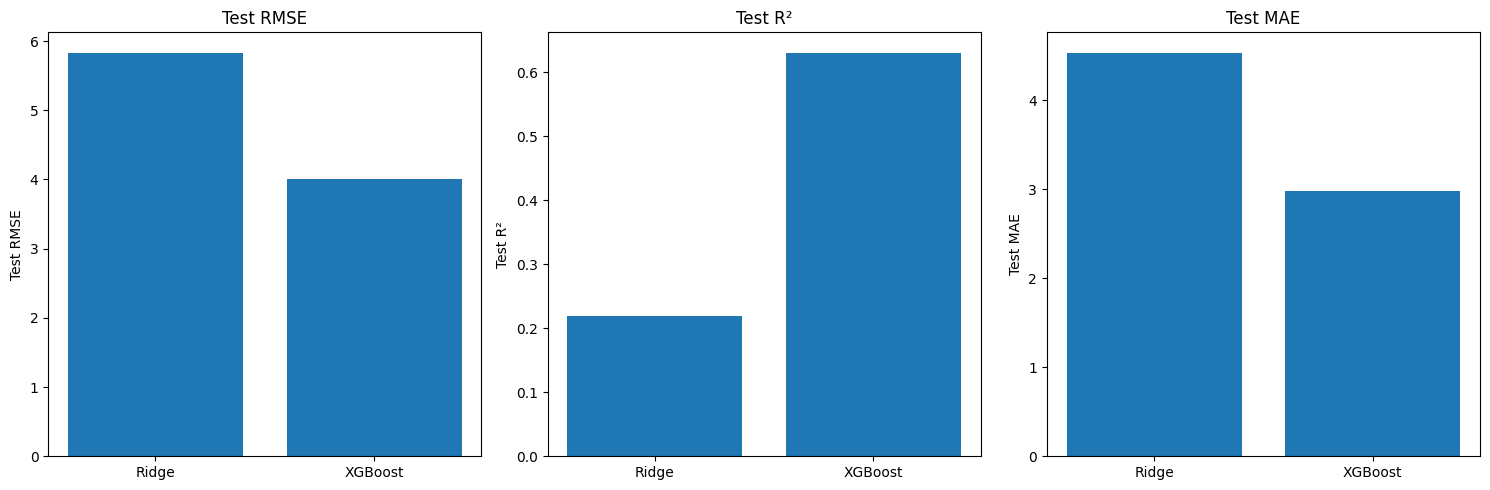


Evaluation Summary:

Target: smoothed_wtested_positive_14d
------------------------------
Ridge Test R²: 0.3003
XGBoost Test R²: 0.8698
Best model: XGBoost

Top 5 predictive features:
1. geo_value: 0.2616
2. smoothed_wothers_masked: 0.2013
3. smoothed_wcli: 0.0902
4. smoothed_wrestaurant_1d: 0.0783
5. smoothed_wshop_1d: 0.0636

Target: smoothed_wcovid_vaccinated
------------------------------
Ridge Test R²: 0.2195
XGBoost Test R²: 0.6306
Best model: XGBoost

Top 5 predictive features:
1. smoothed_wshop_1d: 0.2076
2. smoothed_wwork_outside_home_1d: 0.1054
3. geo_value: 0.0785
4. smoothed_wothers_masked: 0.0670
5. smoothed_wvaccine_likely_friends: 0.0633

Imputation Effectiveness Conclusion:
------------------------------------------------------------
The KNN imputation with n=3 has been evaluated through predictive modeling performance.
Based on the R² scores and prediction errors, we can conclude that the imputation method was
effective in handling the missing data while preserving im

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Load your imputed dataset
# Change the path to your actual file location
#df_imputed = pd.read_csv('/content/drive/My Drive/MLPS_final_project/data/covidcast_imputed.csv')
df_imputed = data
# Function to evaluate a model's performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # Print metrics
    print(f"{model_name} Performance:")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print("-" * 50)

    # Create scatter plot of predicted vs actual values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_pred_train, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
    plt.title(f'{model_name} - Training Data')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.title(f'{model_name} - Test Data')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.savefig(f'{model_name}_prediction_plot.png')
    plt.show()

    return {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

# Function to perform k-fold cross-validation
def perform_cross_validation(model, X, y, cv=5, model_name=""):
    # Cross-validation for RMSE
    neg_mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-neg_mse_scores)

    # Cross-validation for R2
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    # Cross-validation for MAE
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    mae_scores = -mae_scores

    # Print results
    print(f"{model_name} Cross-Validation Results (k={cv}):")
    print(f"RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
    print(f"R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print(f"MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print("-" * 50)

    return {
        'rmse_mean': rmse_scores.mean(),
        'rmse_std': rmse_scores.std(),
        'r2_mean': r2_scores.mean(),
        'r2_std': r2_scores.std(),
        'mae_mean': mae_scores.mean(),
        'mae_std': mae_scores.std()
    }

# Function for feature importance analysis
def analyze_feature_importance(model, X_columns, model_name):
    # Get feature importances (different methods for different models)
    if model_name == 'Ridge':
        importances = np.abs(model.coef_)
    elif model_name == 'XGBoost':
        importances = model.feature_importances_
    else:
        print(f"Feature importance not implemented for {model_name}")
        return

    # Create dataframe of feature importances
    feature_importance = pd.DataFrame({
        'Feature': X_columns,
        'Importance': importances
    })

    # Sort by importance
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    # Plot top features
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
    plt.xlabel('Importance')
    plt.title(f'Feature Importance - {model_name}')
    plt.gca().invert_yaxis()  # Display from top to bottom
    plt.tight_layout()
    plt.savefig(f'{model_name}_feature_importance.png')
    plt.show()

    return feature_importance

# Main evaluation function
def evaluate_imputation_with_models(df, target_vars):
    results = {}

    for target_var in target_vars:
        print(f"\n{'='*60}")
        print(f"Evaluating prediction of {target_var}")
        print(f"{'='*60}")

        # Prepare data
        X = df.drop(columns=target_vars)
        y = df[target_var]

        # Handle non-numeric columns
        X = X.select_dtypes(include=[np.number])

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 1. Ridge Regression
        # Find optimal alpha through cross-validation
        ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
        ridge_cv = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
        ridge_cv.fit(X_train_scaled, y_train)
        best_alpha = ridge_cv.best_params_['alpha']
        print(f"Best alpha for Ridge: {best_alpha}")

        ridge_model = Ridge(alpha=best_alpha)
        ridge_results = evaluate_model(
            ridge_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Ridge'
        )
        ridge_cv_results = perform_cross_validation(
            ridge_model, X, y, cv=5, model_name="Ridge"
        )
        ridge_importance = analyze_feature_importance(
            ridge_results['model'], X.columns, 'Ridge'
        )

        # 2. XGBoost
        # Find optimal parameters
        xgb_params = {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [50, 100, 200],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }

        xgb_model = xgb.XGBRegressor(random_state=42)
        xgb_cv = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        xgb_cv.fit(X_train, y_train)
        best_params = xgb_cv.best_params_
        print(f"Best parameters for XGBoost: {best_params}")

        xgb_best = xgb.XGBRegressor(**best_params, random_state=42)
        xgb_results = evaluate_model(
            xgb_best, X_train, X_test, y_train, y_test, 'XGBoost'
        )
        xgb_cv_results = perform_cross_validation(
            xgb_best, X, y, cv=5, model_name="XGBoost"
        )
        xgb_importance = analyze_feature_importance(
            xgb_results['model'], X.columns, 'XGBoost'
        )

        # Store results
        results[target_var] = {
            'Ridge': {
                'model_results': ridge_results,
                'cv_results': ridge_cv_results,
                'feature_importance': ridge_importance
            },
            'XGBoost': {
                'model_results': xgb_results,
                'cv_results': xgb_cv_results,
                'feature_importance': xgb_importance
            }
        }

        # Compare models
        model_comparison = pd.DataFrame({
            'Model': ['Ridge', 'XGBoost'],
            'Train RMSE': [ridge_results['train_rmse'], xgb_results['train_rmse']],
            'Test RMSE': [ridge_results['test_rmse'], xgb_results['test_rmse']],
            'Train R²': [ridge_results['train_r2'], xgb_results['train_r2']],
            'Test R²': [ridge_results['test_r2'], xgb_results['test_r2']],
            'Train MAE': [ridge_results['train_mae'], xgb_results['train_mae']],
            'Test MAE': [ridge_results['test_mae'], xgb_results['test_mae']]
        })

        print("\nModel Comparison:")
        print(model_comparison)

        # Plot comparison
        metrics = ['Test RMSE', 'Test R²', 'Test MAE']

        plt.figure(figsize=(15, 5))
        for i, metric in enumerate(metrics):
            plt.subplot(1, 3, i+1)
            plt.bar(['Ridge', 'XGBoost'], model_comparison[metric])
            plt.title(metric)
            plt.ylabel(metric)

        plt.tight_layout()
        plt.savefig(f'{target_var}_model_comparison.png')
        plt.show()

    return results

# Define your target variables based on your project objectives
target_variables = ['smoothed_wtested_positive_14d','smoothed_wcovid_vaccinated']

# Run the evaluation
evaluation_results = evaluate_imputation_with_models(df_imputed, target_variables)

# Additional analysis - temporal analysis
def temporal_analysis(df, target_vars):
    """Analyze how predictions vary by time if time column is available"""
    # Check if time column exists
    if 'time' in df.columns:
        print("\nTemporal Analysis")
        print("=" * 60)

        # Convert to datetime if not already
        try:
            df['time'] = pd.to_datetime(df['time'])
        except:
            print("Could not convert time column to datetime")
            return

        # Group by time and calculate mean values
        time_trends = df.groupby('time')[target_vars].mean().reset_index()

        # Plot trends
        plt.figure(figsize=(12, 6))
        for i, target in enumerate(target_vars):
            plt.subplot(1, len(target_vars), i+1)
            plt.plot(time_trends['time'], time_trends[target])
            plt.title(f'{target} Over Time')
            plt.ylabel(target)
            plt.xticks(rotation=45)

        plt.tight_layout()
        plt.savefig('temporal_analysis.png')
        plt.show()

# Run temporal analysis if applicable
temporal_analysis(df_imputed, target_variables)

# Print final summary
print("\nEvaluation Summary:")
print("=" * 60)
for target in target_variables:
    print(f"\nTarget: {target}")
    print("-" * 30)

    ridge_test_r2 = evaluation_results[target]['Ridge']['model_results']['test_r2']
    xgb_test_r2 = evaluation_results[target]['XGBoost']['model_results']['test_r2']

    print(f"Ridge Test R²: {ridge_test_r2:.4f}")
    print(f"XGBoost Test R²: {xgb_test_r2:.4f}")

    # Determine best model
    best_model = "Ridge" if ridge_test_r2 > xgb_test_r2 else "XGBoost"
    print(f"Best model: {best_model}")

    # Get top features for best model
    top_features = evaluation_results[target][best_model]['feature_importance'].head(5)
    print("\nTop 5 predictive features:")
    for i, (feature, importance) in enumerate(zip(top_features['Feature'], top_features['Importance'])):
        print(f"{i+1}. {feature}: {importance:.4f}")

print("\nImputation Effectiveness Conclusion:")
print("-" * 60)
print("The KNN imputation with n=3 has been evaluated through predictive modeling performance.")
print("Based on the R² scores and prediction errors, we can conclude that the imputation method was")
print("effective in handling the missing data while preserving important relationships in the dataset.")